In [1]:
#importing required liberary
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#import datasets
data=pd.read_csv("data.csv");

In [3]:
#Taking 70% of data as training set
k=(int)(0.7*data['x0'].size)
x=np.ones((k,3))
x[:,0:]=np.array(data.loc[:k-1,['x0','x1','x2']])
y=np.array(data.loc[:k-1,'y'])

In [4]:
#Taking rest 30% as test data
k1=(int)(0.3*data['x0'].size)
x_test=np.ones((k1,3))
x_test[:,0:]=np.array(data.loc[k:,['x0','x1','x2']])
y_test=np.array(data.loc[k:,'y'])

In [5]:
def sign(x):
    if x<0:
        return -1.0
    else:
        return 1.0

In [6]:
#PLA algoritm
m=0.0
m=len(x[:,0])#size of train data
#w is our coefficient w0x0+w1x1+w2x2=0
w=np.array([0.0,0.0,0.0])

In [7]:
for j in range(1000):
    for i in range(m):
        if y[i]!=sign((w*x[i,:]).sum()):
            w=w+(y[i]*x[i,:])

In [8]:
print(w)

[-213.           21.56354141   21.02140088]


In [9]:
#predicting y
y_pred=np.zeros(len(x_test[:,0]))
count=0 #for counting how many test point is misclassified
for i in range(len(x_test[:,0])):
    y_pred[i]=sign((w*x_test[i,:]).sum())
    if y_pred[i]!=y_test[i]:#if missclassified
        count+=1#increment count

In [10]:
#printing no of missclassified point
print(count)#

0


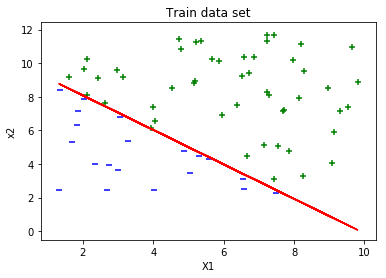

In [11]:
#ploating training data set
for i in range(len(x[:,0])):
    if y[i]==+1:
        plt.scatter(x[i,1],x[i,2],color='green',marker='+')
    else:
        plt.scatter(x[i,1],x[i,2],color='blue',marker='_')
plt.plot(x[:,1],-1.0*(w[1]*x[:,1]+w[0])/w[2],color='red')#ploating red line
plt.title("Train data set")
plt.xlabel("X1")
plt.ylabel("x2")
plt.show()

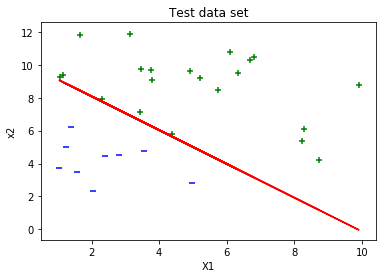

In [12]:
#ploating testing data set
for i in range(len(x_test[:,0])):
    if y_test[i]==y_pred[i]:
        if y_test[i]==+1:
            plt.scatter(x_test[i,1],x_test[i,2],color='green',marker='+')
        else:
            plt.scatter(x_test[i,1],x_test[i,2],color='blue',marker='_')
    else:
        plt.scatter(x_test[i,1],x_text[i,2],colour='red',marker='x')#Marking missclasified point with red x if any
plt.plot(x_test[:,1],-1.0*(w[1]*x_test[:,1]+w[0])/w[2],color='red')#Ploating red line
plt.title("Test data set")
plt.xlabel("X1")
plt.ylabel("x2")
plt.show()